<a href="https://colab.research.google.com/github/minyeongChoi/py-16/blob/master/wk10_py_data_science_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### [1] Make data, Series, and DataFrame

### Series 
벡터구조의 데이터

In [7]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8]) #벡터타입의 데이터 만드는 구조
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) #6은 행의 개수 4는 열의 개수 인덱스로 데이트 사용 문자열 항목의  제목..?
df

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-06,-0.487627,0.328560,0.375496,0.237083


In [10]:
# check types of df  --> same type
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like. 데이터 프레임을 만드는 또다른 방법
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })  #데이터 값이 하나뿐인건 나머지를 같은 값으로 채워준다 브로드캐스트

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
# check types of df2 --> different types
df2.dtypes    #1과2의 차이는 데이터 타입이 다르다. 판다스의 데이터 프레임은 서로 이질적인 데이터 성격을 다룰수 있는 효율적인 구조인다.

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data

In [14]:
# head() 상위 다섯개의 데이터를 보여준다
df.head()

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228


In [15]:
df.head(2) #두개만 보여줌

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846


In [16]:
df.tail(3) #제일 아래서 3개만

,A,B,C,D
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-06,-0.487627,0.328560,0.375496,0.237083


In [17]:
# Display the index, columns, and the underlying NumPy data:
df.index    #인덱스는 시간 date 날짜구조 리스트..얌얌야먕먀랑닐

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns # 각 열의 제목을 보여줌 (ABCD)

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
# describe() shows a quick statistic summary of your data:
df.describe()  #데이터 프레임을 구성하는 각열의 분포를 요약해서 보여준다 전체 데이터의 평균 표준편차...등

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.791514,0.443707,0.093267,0.842057
std,0.828052,0.459416,1.081382,0.983690
min,-0.487627,-0.074095,-1.851115,-0.311469
25%,0.394936,0.216727,-0.077406,0.192191
50%,0.805794,0.358053,0.270520,0.728321
75%,1.416597,0.523883,0.604251,1.342211
max,1.746944,1.271456,1.347565,2.346846


In [20]:
df2.describe() #여섯개의 하옥중에서 숫자형 항목은 ACD 3개라서 (숫자형 항목만 처리해준다.)

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [21]:
# Transposing your dataframe:
df.T #트랜스포즈 행과 열을 바꿔준다.

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.746944,1.021773,0.589814,1.548205,0.329977,-0.487627
B,1.271456,0.179449,0.569330,0.387545,-0.074095,0.328560
C,-1.851115,0.680503,0.165544,1.347565,-0.158390,0.375496
D,1.219559,2.346846,-0.311469,1.383095,0.177228,0.237083


#### Sorting

In [22]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.487627,0.328560,0.375496,0.237083
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-01,1.746944,1.271456,-1.851115,1.219559


In [24]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.219559,-1.851115,1.271456,1.746944
2013-01-02,2.346846,0.680503,0.179449,1.021773
2013-01-03,-0.311469,0.165544,0.569330,0.589814
2013-01-04,1.383095,1.347565,0.387545,1.548205
2013-01-05,0.177228,-0.158390,-0.074095,0.329977
2013-01-06,0.237083,0.375496,0.328560,-0.487627


In [25]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False) #B열을 기준으로

,A,B,C,D
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-06,-0.487627,0.328560,0.375496,0.237083
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-01,1.746944,1.271456,-1.851115,1.219559


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**
로레이션의 인덱스..뭐시기 음으느ㅡㅇ 지ㄴ영아 자지마...졸지마

In [26]:
# Selecting a single column, which yields a Series
df['A'] #

2013-01-01    1.746944
2013-01-02    1.021773
2013-01-03    0.589814
2013-01-04    1.548205
2013-01-05    0.329977
2013-01-06   -0.487627
Freq: D, Name: A, dtype: float64

In [27]:
# Selecting via [], which slices the rows.
df[0:3] # 행 인덱스  0 1 2

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469


In [28]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지전된 범위가 다 선택된다.
           #

,A,B,C,D
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095


#### Selecting data by label

In [29]:
df

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-06,-0.487627,0.328560,0.375496,0.237083


In [30]:
df.loc[dates[0]]   # loc() 0번째 데이트 인덱스의 값을 가져와라 제일 윗줄 출력

A    1.746944
B    1.271456
C   -1.851115
D    1.219559
Name: 2013-01-01 00:00:00, dtype: float64

In [31]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']]  #모든 인덱싱은 대괄호 /행은 전부다 열은 AB열 

,A,B
2013-01-01,1.746944,1.271456
2013-01-02,1.021773,0.179449
2013-01-03,0.589814,0.569330
2013-01-04,1.548205,0.387545
2013-01-05,0.329977,-0.074095
2013-01-06,-0.487627,0.328560


#### [도전코딩] *기말*

> Select data for first two days AND comumn 3,4 from df.

In [0]:
# df.loc[1:3,['C','D']] #locc를 쓸땐 인덱스를 X
# df.loc['20130101':'20130102',['C','D']]
# df.loc[dates[:2],['C','D']]

In [34]:
df.loc['20130101':'20130102',['C','D']] #

,C,D
2013-01-01,-1.851115,1.219559
2013-01-02,0.680503,2.346846


In [35]:
df.loc[dates[:2],['C','D']]

,C,D
2013-01-01,-1.851115,1.219559
2013-01-02,0.680503,2.346846


#### Selecting data by position  (iloc()) **

In [36]:
df

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-06,-0.487627,0.328560,0.375496,0.237083


In [37]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨.

A    1.548205
B    0.387545
C    1.347565
D    1.383095
Name: 2013-01-04 00:00:00, dtype: float64

In [38]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,-1.851115,1.219559
2013-01-02,0.680503,2.346846


In [39]:
# Select one item  하나의 항목을 뽑아낸다
df.iloc[1,1]

0.1794486052063111

#### Selecting data by Boolean indexing

In [40]:
df

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228
2013-01-06,-0.487627,0.328560,0.375496,0.237083


In [41]:
df[df.A > 0] #df라는 데이터 프레임에서 에서 a가 0보다 큰것을 찾아라

,A,B,C,D
2013-01-01,1.746944,1.271456,-1.851115,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,-0.311469
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,-0.074095,-0.158390,0.177228


In [43]:
df[df > 0]# df 전체가 0보다 큰놈들을 찾아내라 NaN = 0보다 작은애들

,A,B,C,D
2013-01-01,1.746944,1.271456,NaN,1.219559
2013-01-02,1.021773,0.179449,0.680503,2.346846
2013-01-03,0.589814,0.569330,0.165544,NaN
2013-01-04,1.548205,0.387545,1.347565,1.383095
2013-01-05,0.329977,NaN,NaN,0.177228
2013-01-06,NaN,0.328560,0.375496,0.237083


### Setting (데이터 재구성 또는 확장)

In [44]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1 #f라는 열을 하나 추가

In [46]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,1.746944,1.271456,-1.851115,1.219559,NaN
2013-01-02,1.021773,0.179449,0.680503,2.346846,1.0
2013-01-03,0.589814,0.569330,0.165544,-0.311469,2.0
2013-01-04,1.548205,0.387545,1.347565,1.383095,3.0
2013-01-05,0.329977,-0.074095,-0.158390,0.177228,4.0
2013-01-06,-0.487627,0.328560,0.375496,0.237083,5.0


In [47]:
# Setting values by label:
df.at[dates[0],'A'] = 0 # 주어진 데이터 프레임을 재구성하고 변화
df

,A,B,C,D,F
2013-01-01,0.000000,1.271456,-1.851115,1.219559,NaN
2013-01-02,1.021773,0.179449,0.680503,2.346846,1.0
2013-01-03,0.589814,0.569330,0.165544,-0.311469,2.0
2013-01-04,1.548205,0.387545,1.347565,1.383095,3.0
2013-01-05,0.329977,-0.074095,-0.158390,0.177228,4.0
2013-01-06,-0.487627,0.328560,0.375496,0.237083,5.0


In [0]:
# Setting values by position (index):
df.iat[0,1] = 0
df

In [48]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,1.271456,-1.851115,5,NaN
2013-01-02,1.021773,0.179449,0.680503,5,1.0
2013-01-03,0.589814,0.569330,0.165544,5,2.0
2013-01-04,1.548205,0.387545,1.347565,5,3.0
2013-01-05,0.329977,-0.074095,-0.158390,5,4.0
2013-01-06,-0.487627,0.328560,0.375496,5,5.0


### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

In [53]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.271456,-1.851115,5,NaN,NaN
2013-01-02,1.021773,0.179449,0.680503,5,1.0,NaN
2013-01-03,0.589814,0.569330,0.165544,5,2.0,NaN
2013-01-04,1.548205,0.387545,1.347565,5,3.0,NaN


In [51]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.271456,-1.851115,5,NaN,1.0
2013-01-02,1.021773,0.179449,0.680503,5,1.0,1.0
2013-01-03,0.589814,0.569330,0.165544,5,2.0,NaN
2013-01-04,1.548205,0.387545,1.347565,5,3.0,NaN


In [0]:
# To drop any rows that have missing data.
df1.dropna(how='any')

In [54]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,1.271456,-1.851115,5,5.0,5.0
2013-01-02,1.021773,0.179449,0.680503,5,1.0,5.0
2013-01-03,0.589814,0.569330,0.165544,5,2.0,5.0
2013-01-04,1.548205,0.387545,1.347565,5,3.0,5.0


In [0]:
# Get the boolean mask where values are nan.
pd.isna(df1)

### Stats

In [0]:
df

In [0]:
df.mean()

In [0]:
df.mean(0)

In [0]:
df.mean(1)

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

In [0]:
# sin그래프를 그린다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s)    # sin의 그래프를 그림

In [0]:
# plt.plot(np.arange(0.0, 2.0, 0.01),s)

In [0]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


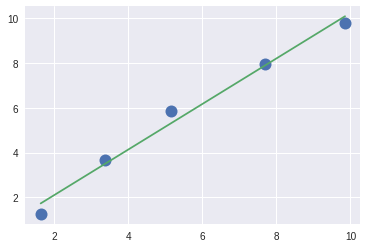

In [58]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)])
a = a.T
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

In [0]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=4)

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [0]:
fontsfamily[:5]

***

# Chapter 12-04
## 일본 인구를 시각화한다

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### 인구 데이터를 읽어 들임

In [65]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

OSError: ignored

In [0]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly

In [0]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000))
plt.grid(True)

In [0]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1)
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

In [0]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)

> year를 변경해서 그래프를 그려보시오.

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***